In [2]:
import numpy as np
import pandas as pd

In [3]:
np.random.seed(32)

n_samples = 1000
class_0_ratio = 0.9
n_class_0 = int(n_samples * class_0_ratio)
n_class_1 = n_samples - n_class_0

In [4]:
n_class_0, n_class_1

(900, 100)

In [5]:
# Creating imbalnced dataset
class_0 = pd.DataFrame({
    'feature_1':np.random.normal(loc=0, scale=1, size=n_class_0),
    'feature_2':np.random.normal(loc=0, scale=1, size=n_class_0),
    'target': [0]* n_class_0
})

class_1 = pd.DataFrame({
    'feature_1':np.random.normal(loc=0, scale=1, size=n_class_1),
    'feature_2':np.random.normal(loc=0, scale=1, size=n_class_1),
    'target': [1] * n_class_1
})

In [6]:
df = pd.concat([class_0, class_1]).reset_index(drop=True)

In [7]:
df.head()

,feature_1,feature_2,target
0,-0.348894,-0.292551,0
1,0.983703,1.303818,0
2,0.580923,-1.479481,0
3,0.070284,-1.783538,0
4,0.777533,-0.256111,0


In [8]:
df.tail()

,feature_1,feature_2,target
995,-0.508619,0.686788,1
996,0.556609,-0.627606,1
997,-2.275100,1.881144,1
998,-0.864580,0.353910,1
999,-1.011863,1.512705,1


In [9]:
df['target'].value_counts()

target
0    900
1    100
Name: count, dtype: int64

In [10]:
# Upsampling
df_minority = df[df['target']==1]
df_majority = df[df['target']==0]

In [11]:
from sklearn.utils import resample
df_minority_upsamplesd = resample(df_minority, replace=True, n_samples=len(df_majority), random_state=32)

In [12]:
df_minority_upsamplesd.shape

(900, 3)

In [13]:
df_upsampled = pd.concat([df_majority, df_minority_upsamplesd])

In [14]:
df_upsampled.shape

(1800, 3)

In [15]:
# Upsampling
from sklearn.utils import resample
df_majority_downsamplesd = resample(df_majority, n_samples=len(df_minority), random_state=32)

In [16]:
df_majority_downsamplesd.shape

(100, 3)

In [17]:
df_downsampled = pd.concat([df_minority, df_majority_downsamplesd])

In [18]:
df_downsampled.shape

(200, 3)

In [19]:
# SMOTE Synthetic Minority Oversampling Technique
from sklearn.datasets import make_classification

In [20]:
X, y = make_classification(n_samples=1000, n_redundant=0, n_features=2, n_clusters_per_class=1, weights=[0.90], random_state=12)

In [21]:
import pandas as pd
df1 = pd.DataFrame(X, columns=['f1', 'f2'])
df2 = pd.DataFrame(y, columns=['target'])
final_pd = pd.concat([df1, df2], axis=1)
final_pd.head()

,f1,f2,target
0,-0.762898,-0.706808,0
1,-1.075436,-1.051162,0
2,-0.610115,-0.909802,0
3,-2.023284,-0.428945,1
4,-0.812921,-1.316206,0


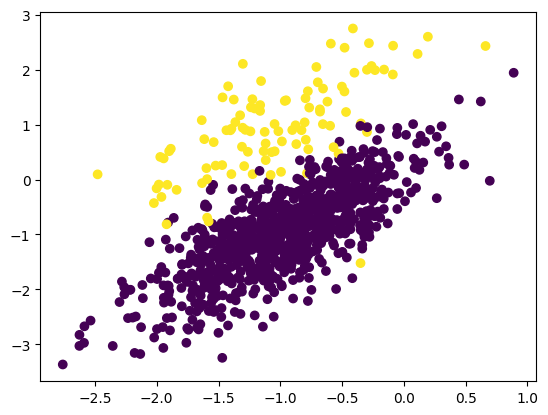

In [22]:
import matplotlib.pyplot as plt
plt.scatter(final_pd['f1'], final_pd['f2'], c=final_pd['target'])

In [23]:
from imblearn.over_sampling import SMOTE

In [24]:
oversample = SMOTE()
X, y = oversample.fit_resample(final_pd[['f1','f2']], final_pd['target'])

In [25]:
X.shape

(1800, 2)

In [26]:
y.shape

(1800,)

In [30]:
y.value_counts()

target
0    900
1    900
Name: count, dtype: int64

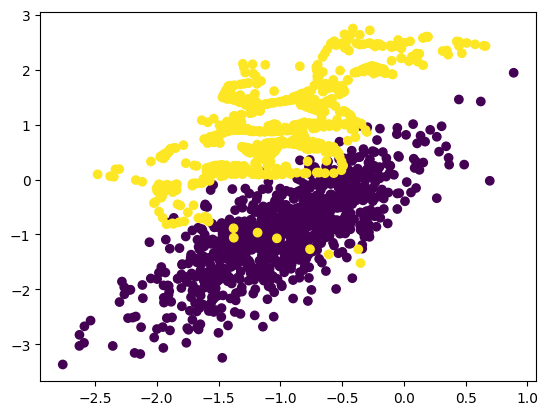

In [31]:
plt.scatter(X['f1'], X['f2'], c=y)